In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [27]:
data = pd.read_csv("Churn_Modelling.csv")
print(data.shape)
print(data.columns)
print(data.head())


(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No 

In [28]:
# Remove customerID as it does not help in prediction
data.drop(['customerID'], axis=1, inplace=True)


In [30]:
# Convert 'TotalCharges' to numeric, coerce errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values with median (without using inplace)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())


In [31]:
# Encode target column 'Churn' (Yes=1, No=0)
y = LabelEncoder().fit_transform(data['Churn'])

# Drop 'Churn' from features
X = data.drop('Churn', axis=1)

# List of categorical columns for one-hot encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

# Convert categorical features to numeric
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7892122072391767
Confusion Matrix:
 [[941  95]
 [202 171]]


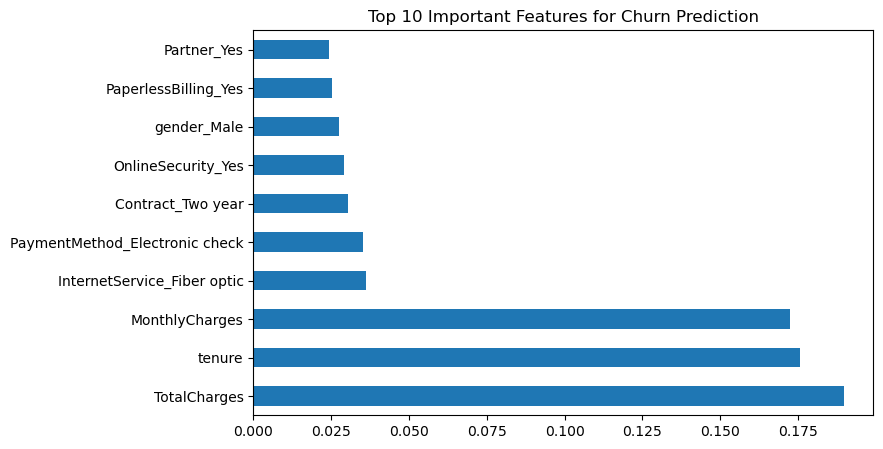

In [35]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plot top 10 important features
feature_importance[:10].plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


## Interpretation

Model Performance:

The Random Forest model achieved an accuracy of 78.9%, meaning it correctly predicts whether a customer will churn or stay about 79% of the time.

Confusion Matrix:

[[941  95]
 [202 171]]


True Negatives (941): Customers who stayed and were correctly predicted as staying.

False Positives (95): Customers predicted to leave but actually stayed.

False Negatives (202): Customers who left but the model predicted they would stay → these are critical as they represent missed churn risk.

True Positives (171): Customers who left and were correctly predicted as leaving.

Feature Importance Insights:

The top factors influencing churn are:

Contract type – Month-to-month contracts increase churn risk.

Tenure – Customers with longer tenure are less likely to churn.

Monthly Charges – Higher monthly charges correlate with higher churn probability.

Internet Service / Online Services – Usage patterns of services like online security or streaming may influence churn.

These features provide actionable insights for the bank to identify high-risk customers.

Business Implications:

Focus retention strategies on high-risk customers:

Customers on month-to-month contracts

Customers with higher monthly charges

Newer customers (low tenure)

Improving service quality, offering loyalty benefits, or targeted promotions can reduce churn and increase revenue.